


# STAT 207: Optimization

Optimization considers the problem 
$$
\begin{aligned}
\text{minimize } f(x)\\
\text{subject to constraints on } x
\end{aligned}
$$

- Maximization or minimization

- Exact or iterative solutions

Why is optimization important in statistics?

- Parameter Estimation:

    - Maximum likelihood estimation (MLE).

    - Maximum a posteriori (MAP) estimation in Bayesian framework.

- Model Selection:

    - AIC/BIC;
 
    - LASSO, penalized regression.
  
- Machine learning: 
    
    - Training neural networks involves minimizing a loss function + certain regularizations.
    

Commonly used optimization methods:

- Newton type algorithms

- Quasi-Newton algorithm
- Expectation-maximization (EM) algorithm
- Majorization-minimization (MM) algorithm
- Gradient Descent


## Basic results

Suppose $f(x)$ is differentiable on the open set $U$:

<br>

- differential $df(x)$

<br>

- gradient $\nabla f(x)$

<br>

- second differential (Hessian) $d^2f(x) = \nabla^2 f(x)$

**(Fermat)** Suppose a differentiable function $f(x)$ has a local minimum at the point $y$ of the open set $U$. Then $\nabla f(x)$ vanishes at $y$.


- Stationary point $y$: $\nabla f(y) = 0$


**NAS Proposition 11.2.3** Suppose a twice continuously differentiable function
$f(x)$ has a local minimum at the point $y$ of the open set $U$. Then $d^2f(x)$ is
positive semidefinite at $y$. Conversely, if $y$ is a stationary point and $d^2f(y)$
is positive definite, then $y$ is a local minimum.


- A function $f$ is coercive if $\lim_{\|x\|_2 \rightarrow \infty} f(x) = \infty$.


**Example**: $f(x) = \frac{1}{2}x^TAx + b^Tx + c$, where $A$ is positive definite.

<br>
<br>
<br>
<br>
<br>

**Example** Show that the sample mean and sample variance are the MLE of the theoretical mean and variance of a random sample $y_1,y_2,..,y_n$ from a multivariate normal distribution.



## Convexity

A function $f: R^n \rightarrow R$ is **convex** if

- $\text{dom} f$ is a convex set: $\alpha x + (1-\alpha) y \in \text{dom} f$ for all $x,y \in \text{dom} f$ and any $\alpha \in (0,1)$, and

- $f(\alpha x + (1-\alpha) y) \le \alpha f(x) + (1-\alpha) f(y)$ for all $x,y \in \text{dom} f$ and any $\alpha \in (0,1)$.

$f$ is **strictly convex** if the inequality is strict for all $x\ne y$ and $\alpha$.

**Supporting hyperplane inequality** A differentiable function $f$ is convex if and only if 
$$
f(y) \ge f(x) + df(x)(y − x)
$$
for all $x,y \in \text{dom} f$.


**Second-order condition for convexity** A twice differentiable function $f$ is convex if and only if $\nabla^2 f(x)$ is PSD for all $x \in \text{dom} f$. It is strictly convex if and only if  $\nabla^2 f(x)$ is PD for all $x \in \text{dom} f$.

### Convexity and global optima

Suppose $f$ is a convex function.

- Any stationary point $y$, i.e., $\nabla f(y)=0$, is a global minimum. (Proof: By supporting hyperplane inequality, $f(x)\geq f(y)+\nabla f(y)^\top(x-y)=f(y)$ for all $x\in\operatorname{dom}f$.)

- Any local minimum is a global minimum.

- The set of (global) minima is convex.

- If $f$ is strictly convex, then the global minimum, if exists, is unique.


**Example: Least squares estimate.** $f(\beta)=\frac{1}{2}\lVert y-X\beta\rVert_2^2$ has Hessian $\nabla^2 f=X^\top X$ which is positive semidefinite. So $f$ is convex and any stationary point (solution to the normal equation) is a global minimum. When $X$ is rank deficient, the set of solutions is convex.

### Jensen's inequality

If $h$ is convex and $W$ a random vector taking values in $\text{dom} f$, then

$$
\mathbb{E}[h(𝐖)] \geq h[\mathbb{E}(𝐖)],
$$

provided both expectations exist. For a strictly convex ℎ, equality holds if and only if $𝑊=𝐄(𝑊)$ almost surely.

**Proof:** Take $x = W$ and $𝐲=𝐄(𝐖)$ in the supporting hyperplane inequality.

### Information inequality

Let $𝑓$ and $𝑔$ be two densities with respect to a common measure $\mu$ and $𝑓,𝑔>0$ almost everywhere relative to $\mu$. Then

$$\mathbb{E}_{𝑓}[\log(𝑓)] \geq \mathbb{E}_{𝑓}[\log(𝑔)],$$

with equality if and only if 𝑓=𝑔 almost everywhere on 𝜇.

**Proof:** Apply Jensen's inequality to the convex function $-\ln(t)$ and random variable 𝑊=𝑔(𝑋)/𝑓(𝑋) where 𝑋∼𝑓.

**Important applications of information inequality:** M-estimation, EM algorithm.

\vspace{50mm}

## Optimization with Equality Constraints

- Suppose the objective function $f(x)$ to be minimized is continuously differentiable and defined on $R^n$.

- The gradient direction $\nabla f(x) = df(x)^T$ is the direction of steepest ascent of $f(x)$ near the point $x$.

- The following linear approximation is often used
$$
f(x + su) = f(x) + sdf(x)u + o(s),
$$
for a unit vector $u$ and a scalar $s$.


**Lagrange multipliers**


The Lagrangian function
$$
\mathcal{L}(x, w) = f(x) + \sum_{i=1}^m w_i g_i(x),
$$
where $f(x)$ is the objective function to minimize, $g_i(x) = 0$ are equality constraints.


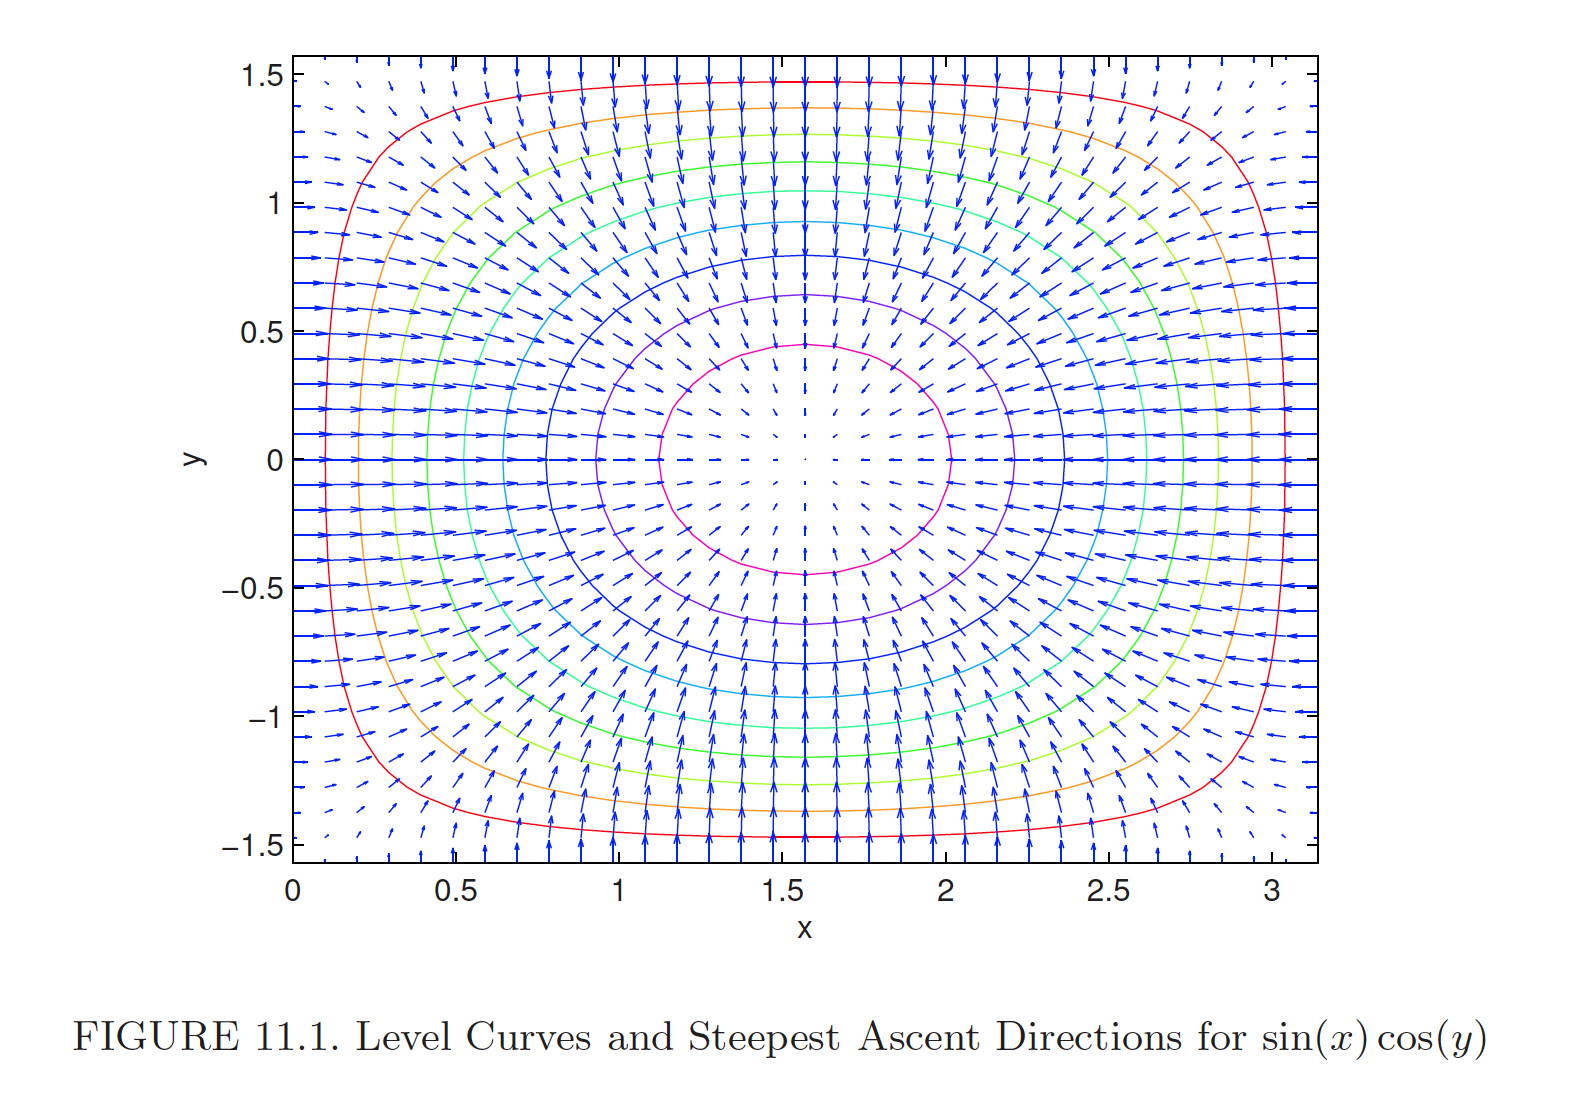

In [3]:
from IPython.display import Image
Image(filename='gradient.png')

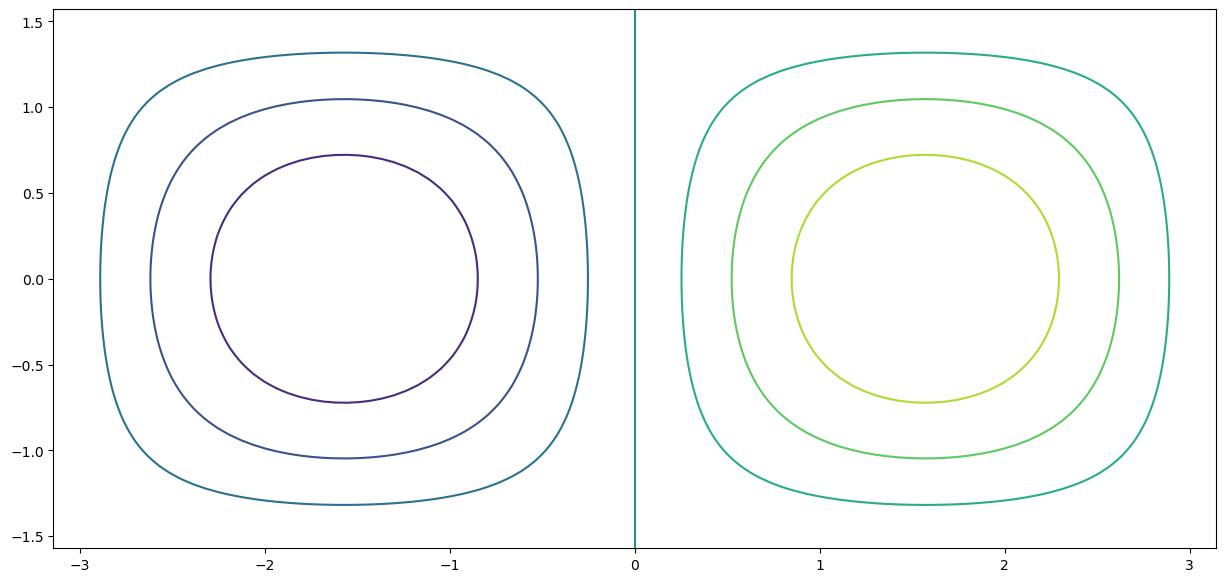

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x, y):
    return np.sin(x) * np.cos(y)

# Define the range of x and y
x = np.linspace(-np.pi, np.pi, 100)
y = np.linspace(-np.pi/2, np.pi/2, 100)

# Create a grid of (x, y) coordinates
X, Y = np.meshgrid(x, y)

# Compute the function values at the grid points
Z = f(X, Y)

# Set up the plot
fig, ax = plt.subplots(figsize=(15, 7))

# Plot the level curves
ax.contour(X, Y, Z)

# Show the plot
plt.show()

**Proposition 11.3.1 (Lagrange)** Suppose the continuously differentiable
function $f(x)$ has a local minimum at the feasible point $y$ and that the
constraint functions $g_1(x),\ldots,g_m(x)$ are continuously differentiable with
linearly independent gradient vectors $\nabla g_i(y)$ at $y$. Then 

- there exists a multiplier vector $\lambda$ such that $(y, \lambda)$ is a stationary point of the Lagrangian. 

Furthermore, if $f(x)$ and all $g_i(x)$ are twice continuously differentiable, then 

- $v^T \nabla^2 L(y) v \geq 0$ for every tangent vector $v$ at $y$. 

Conversely, if $(y, \lambda)$ is a stationary point of the Lagrangian and $v^T \nabla^2 L(y) v > 0$ for every nontrivial tangent vector $v$ at $y$, then 

- $y$ represents a local minimum of $f(x)$ subject to the constraints.

**Example** Quadratic Programming with Equality Constraints

Minimizing a quadratic function

$$
q(x) = \frac{1}{2}x^TAx + b^Tx + c
$$

on $\mathbb{R}^n$ subject to the $m$ linear equality constraints

$$
v_i^Tx = d_i,\quad i=1,..,m
$$

is one of the most important problems in nonlinear programming. 


To minimize $q(x)$ subject to the constraints, we introduce the Lagrangian
$$
L(x, \lambda) = \frac{1}{2}x^TAx + b^Tx + c + \sum_{i=1}^{m}\lambda_i(v_i^Tx - d_i) = \frac{1}{2}x^TAx + b^Tx + c + \lambda^T(Vx - d).
$$
A stationary point of $L(x, \lambda)$ is determined by the equations
$$
Ax + b + V^T\lambda = 0, \\
Vx = d,
$$
whose formal solution amounts to
$$
\begin{pmatrix}
x \\
\lambda
\end{pmatrix}
=
\begin{pmatrix}
A & V^T \\
V & 0
\end{pmatrix}^{-1}
\begin{pmatrix}
-b \\
d
\end{pmatrix}.
$$

The inverse exists thanks to the following proposition.

**Proposition 11.3.2** Let $A$ be an $n \times n$ positive definite matrix and $V$ be an $m \times n$ matrix. Then the matrix
$$M = \begin{bmatrix} A & V^\top \\ V & 0 \end{bmatrix}$$
has inverse
$$M^{-1} = \begin{bmatrix} A^{-1} - A^{-1}V^\top(VA^{-1}V^\top)^{-1}VA^{-1} & - (VA^{-1}V^\top)^{-1}VA^{-1} \\ - A^{-1}V^\top(VA^{-1}V^\top)^{-1} & (VA^{-1}V^\top)^{-1} \end{bmatrix}$$
if and only if $V$ has linearly independent rows $v_{t_1},\dots,v_{t_m}$.

Additional **Example 11.3.4**

## Optimization with Inequality Constraints

Minimize an objective function $f_0(x)$ subject to the mixed constraints
$$
h_i(x) = 0,\quad 1 \leq i \leq p,
$$
$$
f_j(x) \le 0,\quad 1 \leq j \leq m.
$$

A constraint $f_j(x)$ is 

- active at the feasible point $x$ provided $f_j(x) = 0$; 

- it is inactive if $f_j(x) < 0$.

To avoid redundant constraints, we need

- linear independence of the gradients of the equality constraints，

- and a restriction on the active inequality constraints.

### Duality

- The Lagrangian is
$$
\mathcal{L}(\mathbf{x},\boldsymbol{\lambda},\boldsymbol{\nu}) = f_0(\mathbf{x})+\sum_{i=1}^m\lambda_i f_i(\mathbf{x})+\sum_{i=1}^p\nu_i h_i(\mathbf{x}).
$$

The vectors $\boldsymbol{\lambda}=(\lambda_1,\dots,\lambda_m)^{\top}$ and $\boldsymbol{\nu}=(\nu_1,\dots,\nu_p)^{\top}$ are called the Lagrange multiplier vectors or dual variables.

- The **Lagrange dual function** is the minimum value of the Lagrangian over $\mathbf{x}$:
$$
g(\boldsymbol{\lambda},\boldsymbol{\nu}) = \inf_{\mathbf{x}} \mathcal{L}(\mathbf{x},\boldsymbol{\lambda},\boldsymbol{\nu}) = \inf_{\mathbf{x}}\left(f_0(\mathbf{x})+\sum_{i=1}^m\lambda_i f_i(\mathbf{x})+\sum_{i=1}^p\nu_i h_i(\mathbf{x})\right).
$$

- Denote the optimal value of the original problem by $p^*$. For any $\boldsymbol{\lambda}\succeq0$ and any $\boldsymbol{\nu}$, we have
$$
g(\boldsymbol{\lambda},\boldsymbol{\nu}) \leq p^*.
$$

**Proof:** For any feasible point $\widetilde{\mathbf{x}}$,
$$
\mathcal{L}(\widetilde{\mathbf{x}},\boldsymbol{\lambda},\boldsymbol{\nu})=f_0(\widetilde{\mathbf{x}})+\sum_{i=1}^m\lambda_i f_i(\widetilde{\mathbf{x}})+\sum_{i=1}^p\nu_i h_i(\widetilde{\mathbf{x}}) \leq f_0(\widetilde{\mathbf{x}})
$$
because the second term is non-positive and the third term is zero. Then,
$$
g(\boldsymbol{\lambda},\boldsymbol{\nu})=\inf_{\mathbf{x}} \mathcal{L}(\mathbf{x},\boldsymbol{\lambda},\boldsymbol{\nu}) \leq \mathcal{L}(\widetilde{\mathbf{x}},\boldsymbol{\lambda},\boldsymbol{\nu}) \leq f_0(\widetilde{\mathbf{x}}).
$$

- Since each pair $(\lambda, \nu)$ with $\lambda \succeq 0$ gives a lower bound to the optimal value $p^*$, it is natural to ask for the best possible lower bound the Lagrange dual function can provide. This leads to the **Lagrange dual problem**
$$\max_{\lambda \succeq 0} g(\lambda, \nu),$$
which is a convex problem regardless of whether the primal problem is convex or not.

- We denote the optimal value of the Lagrange dual problem by $d^*$, which satisfies the weak duality
$$d^* \leq p^*.$$
The difference $p^*-d^*$ is called the optimal duality gap.

- If the primal problem is convex, that is
$$
\min_{\mathbf{x}} \quad f_0(\mathbf{x}) \\
\text{subject to} \quad f_i(\mathbf{x}) \leq 0, \quad i=1,\ldots,m, \\
\mathbf{Ax}=\mathbf{b},
$$
with $f_0,\ldots,f_m$ convex, we usually (but not always) have strong duality, i.e., $d^* = p^*$.

- The conditions under which strong duality holds are called constraint qualifications. A commonly used one is Slater's condition: There exists a point in the relative interior of the domain such that
$$
f_i(\mathbf{x})<0,\quad i=1,\ldots,m, \\
\mathbf{Ax}=\mathbf{b}.
$$
Such a point is also called **strictly feasible**.

## KKT (Karush, Kuhn, and Tucker) Conditions

- "One of the great triumphs of 20th century applied mathematics."

- Original paper: [Nonlinear Programming by Kuhn and Tucker 1951](https://projecteuclid.org/ebooks/berkeley-symposium-on-mathematical-statistics-and-probability/Proceedings-of-the-Second-Berkeley-Symposium-on-Mathematical-Statistics-and/chapter/Nonlinear-Programming/bsmsp/1200500249)

### Nonconvex problems

- Assume $f_0,\dots,f_m,h_1,\dots,h_p$ are differentiable. Let $\mathbf{x}^*$ and $(\boldsymbol{\lambda}^*,\boldsymbol{\nu}^*)$ be any primal and dual optimal points with zero duality gap, i.e., strong duality holds.

- Since $\mathbf{x}^*$ minimizes $L(\mathbf{x},\boldsymbol{\lambda}^*,\boldsymbol{\nu}^*)$ over $\mathbf{x}$, its gradient vanishes at $\mathbf{x}^*$, we have the Karush-Kuhn-Tucker (KKT) conditions:

    - Stationarity
    $$
    \nabla f_0(\mathbf{x}^*) + \sum_{i=1}^m \boldsymbol{\lambda}_i^* \nabla f_i(\mathbf{x}^*) + \sum_{i=1}^p \boldsymbol{\nu}_i^* \nabla h_i(\mathbf{x}^*) = \mathbf{0}.
    $$
    
    - Primal feasibility
    $$
    f_i(\mathbf{x}^*) \leq 0, \quad i=1,\dots,m \\
    h_i(\mathbf{x}^*) = 0, \quad i=1,\dots,p 
    $$
    
    - Dual feasibility
$$
\boldsymbol{\lambda}^* \geq \mathbf{0}, 
$$

    - Complementary slackness
    $$
    \boldsymbol{\lambda}^* \cdot \mathbf{f}(\mathbf{x}^*) = 0 
    $$

- The fourth condition (complementary slackness) follows from:

$$f_0(\mathbf{x}^*) = \inf_{\mathbf{x}} \{ f_0(\mathbf{x}) + \sum_{i=1}^m \boldsymbol{\lambda}_i^* f_i(\mathbf{x}) + \sum_{i=1}^p \boldsymbol{\nu}_i^* h_i(\mathbf{x}) \}$$

Since $\sum_{i=1}^m \boldsymbol{\lambda}_i^* f_i(\mathbf{x}^*) = 0$ and each term is non-positive, we have $\boldsymbol{\lambda}_i^* f_i(\mathbf{x}^*) = 0$, $i=1,\dots,m$.

- To summarize, for any optimization problem with differentiable objective and constraint functions for which strong duality obtains, any pair of primal and dual optimal points must satisfy the KKT conditions.

### Convex problems

- When the primal problem is convex, the KKT conditions are also sufficient for the points to be primal and dual optimal.

- If $f_i$ are convex and $h_i$ are affine, and $(\tilde{x},\tilde{\lambda},\tilde{\nu})$ satisfy the KKT conditions, then $\tilde{x}$ and $(\tilde{\lambda},\tilde{\nu})$ are primal and dual optimal, with zero duality gap.

- The KKT conditions play an important role in optimization. Many algorithms for convex optimization are conceived as, or can be interpreted as, methods for solving the KKT conditions.

## Python Implementations


- [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html)

- [Duke lectures](https://people.duke.edu/~ccc14/sta-663-2018/notebooks/S09B_Optimization.html)